In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import nltk
import nltk.corpus
import re
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [5]:
train_df = pd.read_table("2013_Queensland_Floods_train.tsv")
test_df = pd.read_table("2013_Queensland_Floods_test.tsv")
col_names = train_df.columns
train_df["text"]

0       I just though about the night I went clubbing ...
1       Looks like its going to be another long night ...
2       @LaniiBanani hahahaha I just told him id have ...
3       Off to meeting.... with so called... Baaps of ...
4                Doubt I'll be getting much sleep tonight
                              ...                        
6014    RT @GrillTeam: The Queensland government has s...
6015    Can we have 5 NEMA staff from Nigeria  come to...
6016    RT @7NewsBrisbane: Foam from rough waves at Al...
6017    RT @abcsouthqld: Master Electricians Australia...
6018    RT @HomeLoanKing: Leader of Aussie opposition,...
Name: text, Length: 6019, dtype: object

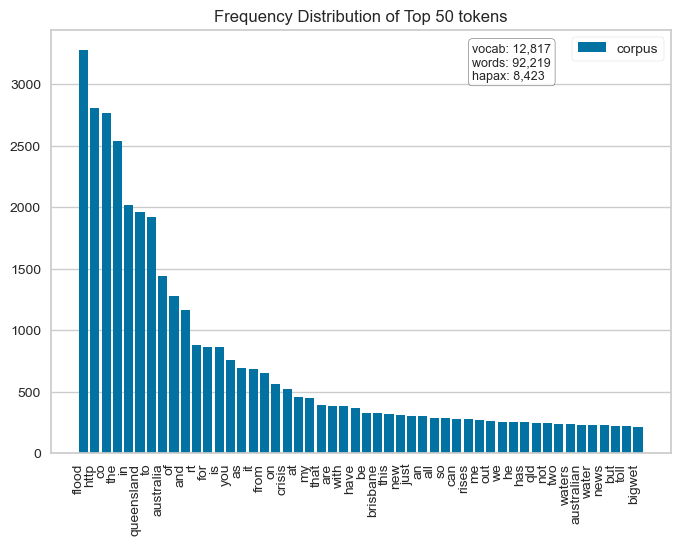

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [6]:
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(train_df["text"])
features   = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [7]:
from sklearn.model_selection import train_test_split

train_text = train_df["text"]
train_labels = train_df["label"]

test_text = test_df["text"]
test_labels = test_df["label"]

print(train_text.shape)
print(test_text.shape)

(6019,)
(3011,)


In [5]:
# remove digits, @-mentions, links, stopwords

train_text = train_text.str.lower()
train_text = train_text.apply(lambda elem: re.sub(r"\d+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"@[a-zA-Z0-9-]+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", elem))
train_text = train_text.apply(lambda x : nltk.word_tokenize(x))
train_text = train_text.apply(lambda x : " ".join([word for word in x if word not in (nltk.corpus.stopwords.words() + ["rt"])]))

test_text = test_text.str.lower()
test_text = test_text.apply(lambda elem: re.sub(r"\d+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"@[a-zA-Z0-9-]+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", elem))
test_text = test_text.apply(lambda x : nltk.word_tokenize(x))
test_text = test_text.apply(lambda x : " ".join([word for word in x if word not in (nltk.corpus.stopwords.words() + ["rt"])]))

train_text.shape

(6019,)

In [8]:
train_text = train_text.apply(lambda elem: re.sub(r"#", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\.", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\,", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\?", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\!", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\:", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\;", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\-", " ", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\'", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\_", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\/", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\*", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\%", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\&", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\\", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"@\s[a-zA-Z0-9]+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"@", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\$", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\[", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\]", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\~", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\(", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\)", "", elem))
train_text = train_text.apply(lambda elem: re.sub("http", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\s\s*", " ", elem))
train_text = train_text.apply(lambda elem: re.sub(r"^\s+", "", elem))
train_text = train_text.apply(lambda elem: re.sub(r"\s+$", "", elem))

test_text = test_text.apply(lambda elem: re.sub(r"#", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\.", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\,", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\?", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\!", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\:", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\;", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\-", " ", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\'", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\_", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\/", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\*", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\+", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\%", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\&", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\\", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"@\s[a-zA-Z0-9]+", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"@", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\$", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\[", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\]", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\~", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\(", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\)", "", elem))
test_text = test_text.apply(lambda elem: re.sub("http", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\s\s*", " ", elem))
test_text = test_text.apply(lambda elem: re.sub(r"^\s+", "", elem))
test_text = test_text.apply(lambda elem: re.sub(r"\s+$", "", elem))


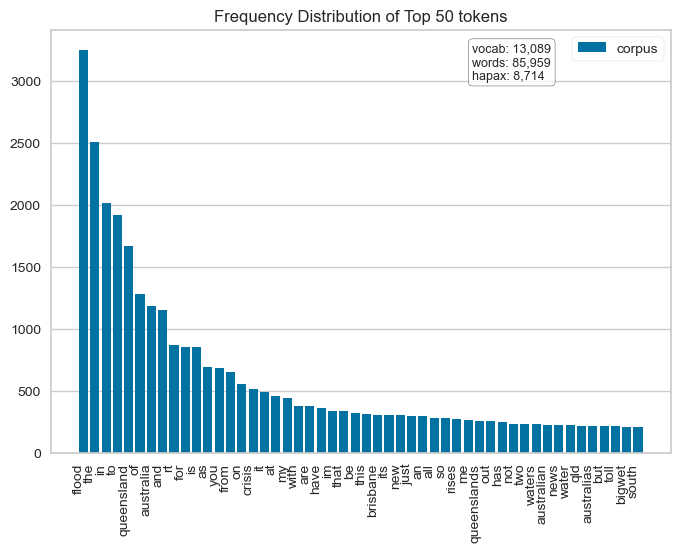

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [9]:
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(pd.DataFrame(train_text)["text"])
features   = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

b'not_relevant' 	 0.46037547765409537
b'relevant' 	 0.5396245223459046


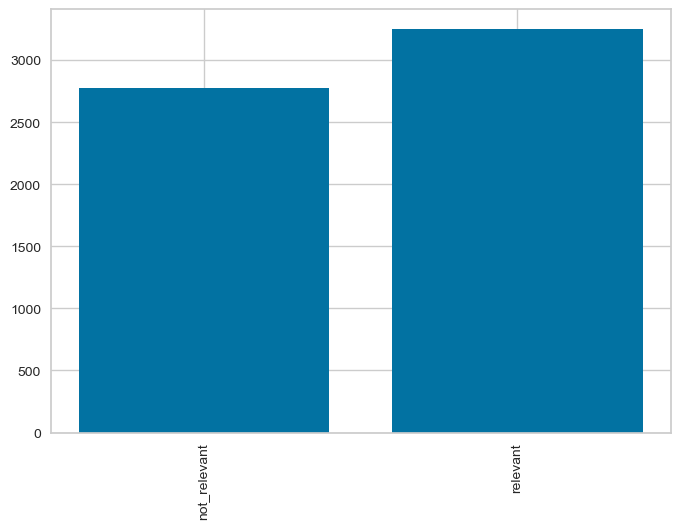

In [10]:
clean_train_df = pd.DataFrame(np.column_stack((np.array(train_text), np.array(train_labels))), columns=["text", "label"])
clean_test_df = pd.DataFrame(np.column_stack((np.array(test_text), np.array(test_labels))), columns=["text", "label"])

train_text = tf.convert_to_tensor(train_text)
train_labels = tf.convert_to_tensor(train_labels)

test_text = tf.convert_to_tensor(test_text)
test_labels = tf.convert_to_tensor(test_labels)

labels = tf.unique(train_labels)[0]
#print(np.array(tf.unique(train_labels)[1]))

for x in range(0,len(labels)):
  print(np.array(labels)[x], '\t', np.mean(x == tf.unique(train_labels)[1]))
plt.bar(np.array(labels), [np.sum(x == tf.unique(train_labels)[1]) for x in range(0,len(labels))])
plt.xticks(rotation = 90)
plt.show()

In [15]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [12]:
from sklearn.model_selection import train_test_split
X_train, _, y_train, _ = train_test_split(np.array(train_text), np.array(train_labels), train_size=2000, shuffle=True)
preprocessed_text = bert_preprocess_model(X_train)

X_test, _, y_test, _ = train_test_split(np.array(test_text), np.array(test_labels), train_size=300, shuffle=True)
preprocessed_test_text = bert_preprocess_model(X_test)
preprocessed_text.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [13]:
print(preprocessed_text)

{'input_word_ids': <tf.Tensor: shape=(2000, 128), dtype=int32, numpy=
array([[  101,  2424,  1996, ...,     0,     0,     0],
       [  101,  3336, 11812, ...,     0,     0,     0],
       [  101,  5683,  2066, ...,     0,     0,     0],
       ...,
       [  101,  3193,  2013, ...,     0,     0,     0],
       [  101,  2028,  1997, ...,     0,     0,     0],
       [  101,  9698,  9697, ...,     0,     0,     0]])>, 'input_type_ids': <tf.Tensor: shape=(2000, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'input_mask': <tf.Tensor: shape=(2000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}


In [18]:
bert_model = hub.KerasLayer(encoder_url)

OSError: SavedModel file does not exist at: C:\Users\Bram\AppData\Local\Temp\tfhub_modules\d760773f85f64fc84ae0b47310f7cfe3bcec4868\{saved_model.pbtxt|saved_model.pb}

In [13]:
bert_results = bert_model(preprocessed_text)

bert_test_results = bert_model(preprocessed_test_text)
bert_results.keys()

dict_keys(['sequence_output', 'default', 'pooled_output', 'encoder_outputs'])

In [14]:
print("default", bert_results["default"].shape)
print("pooled_output", bert_results["pooled_output"].shape)
print("sequence_output", bert_results["sequence_output"].shape)
# these are the outputs of the 12 encoder layers: bert_results["encoder_outputs"]

default (2000, 768)
pooled_output (2000, 768)
sequence_output (2000, 128, 768)


In [15]:
sequence_output = np.array(bert_results["sequence_output"])

X_train = sequence_output.reshape(X_train.shape[0], 128*768)

X_test = np.array(bert_test_results["sequence_output"]).reshape(X_test.shape[0], 128*768)

In [16]:
from sklearn import neural_network

clf1 = neural_network.MLPClassifier(hidden_layer_sizes=(32,))
clf1.fit(X_train, tf.unique(y_train)[1])

MLPClassifier(hidden_layer_sizes=(32,))

In [17]:
print("Train accuracy:", np.mean(clf1.predict(X_train) == tf.unique(y_train)[1]))
print("Test accuracy:", np.mean(clf1.predict(X_test) == tf.unique(y_test)[1]))

Train accuracy: 0.999
Test accuracy: 0.9566666666666667


# KMeans clustering and decision trees

## Based on words

In [18]:
from sklearn.decomposition import PCA, IncrementalPCA

flat_word_output = sequence_output.reshape(len(X_train)*128, 768)

mc_seq = flat_word_output - np.mean(flat_word_output, axis=0)

ipca = IncrementalPCA(n_components = 32)
ipca_X = ipca.fit_transform(mc_seq)

In [19]:
new_ipca = IncrementalPCA(n_components=256)
new_ipca_X = new_ipca.fit_transform(mc_seq)
print(new_ipca.explained_variance_ratio_, np.sum(new_ipca.explained_variance_ratio_))

[0.10639696 0.07373746 0.0604982  0.03357996 0.03261546 0.02577343
 0.01830533 0.01510622 0.01412332 0.01311219 0.01228565 0.01107519
 0.00969988 0.00931485 0.00927967 0.00853429 0.00793566 0.00748303
 0.00727123 0.00654108 0.00640885 0.00632153 0.00600274 0.00577597
 0.00567019 0.00553239 0.00506519 0.00490167 0.00474516 0.00468411
 0.00455392 0.00440849 0.00428488 0.00426913 0.00411251 0.00405564
 0.00395738 0.00379704 0.00375405 0.00364235 0.00351447 0.00350453
 0.00342734 0.00340804 0.00334342 0.00320832 0.00319369 0.00307234
 0.00301644 0.00296833 0.00293337 0.00290591 0.00285723 0.00282994
 0.00279627 0.0027056  0.00267573 0.00265039 0.00262216 0.00258259
 0.00254739 0.00249808 0.00247325 0.00244054 0.00239904 0.00237676
 0.0023402  0.00231793 0.00227571 0.00221194 0.00219644 0.00217886
 0.00216022 0.00213883 0.00211259 0.00208118 0.00205944 0.00203585
 0.00202858 0.00199593 0.00198379 0.00194103 0.00193694 0.001906
 0.00186648 0.00185418 0.00182656 0.0018089  0.00180339 0.001779

In [20]:
print(ipca_X.shape)

(256000, 32)


[1 0 0 ... 1 1 1]


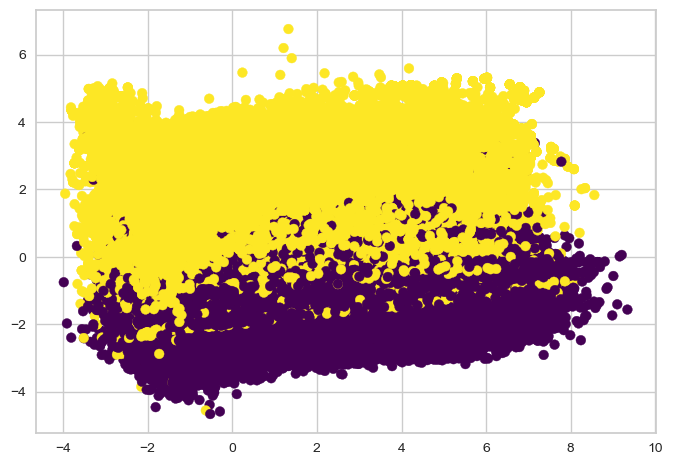

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labs = le.fit_transform(y_train)
print(labs)
np.repeat(le, 128)
plt.scatter(ipca_X[:,0], ipca_X[:,1], c=np.repeat(labs, 128), cmap="viridis")

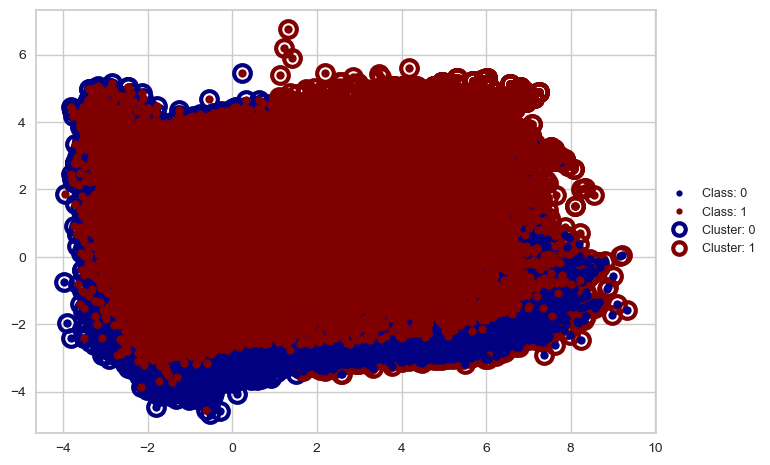

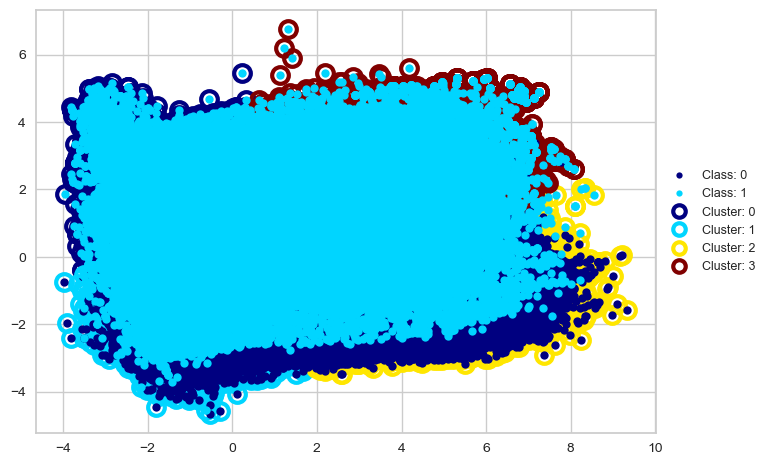

In [22]:
from sklearn.cluster import KMeans
from clusterPlot import clusterPlot
from clusterVal import clusterVal

pred1 = KMeans(n_clusters=2).fit_predict(ipca_X[:,:2])
clusterPlot(ipca_X[:,:2], pred1, y=np.repeat(labs, 128))
plt.show()
pred2 = KMeans(n_clusters=4).fit_predict(ipca_X[:,:2])
clusterPlot(ipca_X[:,:2], pred2, y=np.repeat(labs, 128))
plt.show()

### n_clusters=4

In [23]:
km4 = KMeans(n_clusters=4).fit(new_ipca_X)
pred4 = km4.predict(new_ipca_X)

In [24]:
from sklearn.neighbors import NearestNeighbors
centers = km4.cluster_centers_
clusters = []

for i in range(4):
  clusters.append([])
for i in range(len(new_ipca_X)):
  clusters[pred4[i]].append(new_ipca_X[i])

(256000,)
1
0.5545


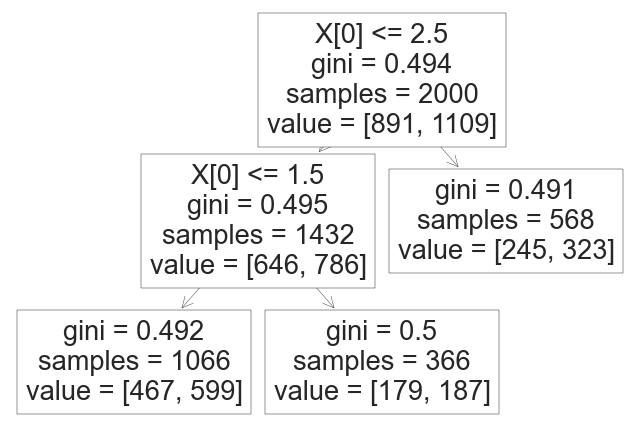

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(max_depth=2)
newX = []
print(pred4.shape)
for i in range(X_train.shape[0]):
  newX.append([pred4[i]])
print(len(newX[0]))
dtc.fit(newX, labs)
print(np.mean(dtc.predict(newX) == labs))

plot_tree(dtc, )
plt.show()

n_clusters=16

In [26]:
km16 = KMeans(n_clusters=16)
km16.fit(new_ipca_X)
pred16 = km16.predict(new_ipca_X)

In [27]:
from sklearn.neighbors import NearestNeighbors
centers = km16.cluster_centers_
clusters = []

for i in range(16):
  clusters.append([])
for i in range(len(new_ipca_X)):
  clusters[pred16[i]].append(new_ipca_X[i])

In [28]:
clean_ipca = np.zeros((128 * len(preprocessed_text["input_mask"]), 256))
for i in range(len(preprocessed_text["input_mask"])):
  for j in range(1, 127):
    if(preprocessed_text["input_mask"][i][j] == 0):
      clean_ipca[(i*128+j)] = [0]*256
    else:
      clean_ipca[(i*128+j)] = new_ipca_X[(i*128+j)]

In [29]:
rep_ids = np.zeros((16,5))
nn = NearestNeighbors(n_neighbors=5)
for i in range(16):
  nn.fit(clean_ipca)
  distances, indices = nn.kneighbors([centers[i]])
  rep_ids[i] = indices

In [30]:
bytes_np = np.array(train_text)
text_np = []
for i in range(len(preprocessed_text["input_mask"])):
  text_np.append([])
  byte_text = bytes_np[i]
  byte_text = str(byte_text)[2:-1]
  text_np[i].append("[CLS]")
  for t in byte_text.split(" "):
    text_np[i].append(t)
  text_np[i].append("[SEP]")

(256000,)
256000
0.5545


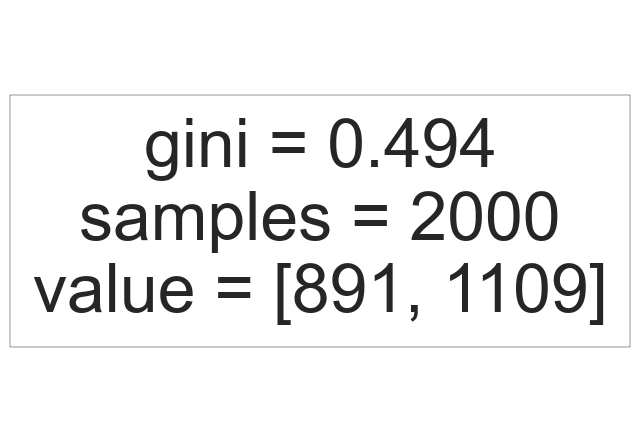

In [31]:
dtc = DecisionTreeClassifier(max_depth=2)
newX = []
print(pred16.shape)
for i in range(len(preprocessed_text["input_mask"])):
  newX.append(pred16)
print(len(newX[0]))
dtc.fit(newX, labs)
print(np.mean(dtc.predict(newX) == labs))

plot_tree(dtc, )
plt.show()

### Conclusion: it is impossible to predict whether a sentence is relevant to floods with just a clustering of words

## Based on sentences

In [32]:
km4 = KMeans(n_clusters=4).fit(X_train)

c:\Users\Bram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [33]:
pred4 = km4.predict(X_train)

0.905


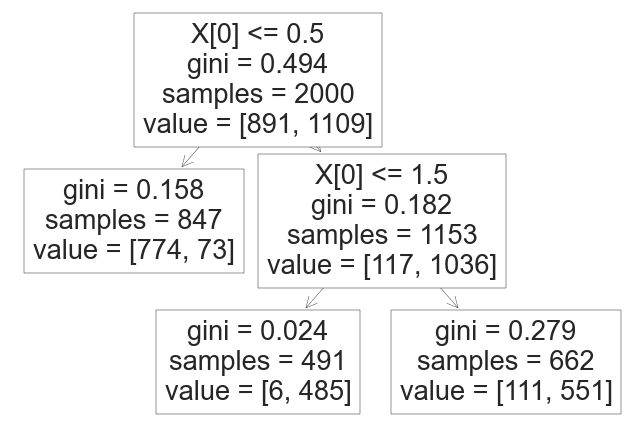

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(max_depth=2)

dtc.fit(pred4.reshape(len(preprocessed_text["input_mask"]), -1), labs)
print(np.mean(dtc.predict(pred4.reshape(len(preprocessed_text["input_mask"]),-1)) == labs))

plot_tree(dtc, )
plt.show()

In [35]:
ipca = IncrementalPCA(n_components = 16)
ipca_X = ipca.fit_transform(X_train)

print(np.sum(ipca.explained_variance_ratio_))

km16 = KMeans(n_clusters=16)
km16.fit(ipca_X)
pred16 = km16.predict(ipca_X)

0.3314465


c:\Users\Bram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [36]:
centers = km16.cluster_centers_
print(ipca_X.shape)
nn = NearestNeighbors(n_neighbors=5)
rep_indices = np.zeros((16,5))
for i in range(16):
  nn.fit(ipca_X)
  distances, indices = nn.kneighbors([centers[i]])
  rep_indices[i] = indices

(2000, 16)


In [37]:
rep_sentences = []
train_text_np = np.array(train_text)
for i in range(16):
  rep_sentences.append([])
  for j in range(5):
    rep_sentences[i].append(str(train_text_np[int(rep_indices[i][j])])[2:-1])

0.635


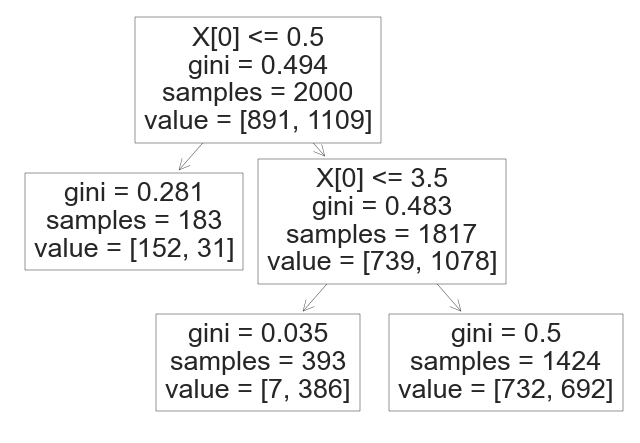

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(pred16.reshape(len(preprocessed_text["input_mask"]),-1), labs)
print(np.mean(dtc.predict(pred16.reshape(len(preprocessed_text["input_mask"]),-1)) == labs))

plot_tree(dtc, )
plt.show()

In [39]:
for i in range(16):
  print(rep_sentences[i])

['sorry bus', 'lunch outing beautiful daughter cool drink lemon line amp bitters waiting lunch', 'time ride', 'yep boat monaive', 'watched ep cm missed ep huff kathy eps friends']
['mcewan buddy lookin civvy s finding job easy ll provide pool table', 'watching liverpool vs arsenal night wish barclays premierleague', 's tempting sydney calling unfortunately back tim', 'cunt wait friday sat', 'message fuck give anti everything give pretty vacant day']
['start tomoz laneway festival laneway specials am pm food beer wine amp carafes', 'm appearing night week encores demand s called society', 'made feel thirsty', 'hey liam hoping follow time xxxliampayne', 'm workwear discounts toowoomba city queensland']
['eeek rive bit tina eleanor schonell bridge', 'precious immediately strait room stocking power fr phone amp ipad haha gah sooooo bored', 'lfl commissioner s corner mention joey qld impressed lflaustralia lflqld taa', 'samoans make happy', 'doubt ll sleep tonight']
['daily trick question f

### Conclusion: sentence clustering can make a decent prediction, but it is not interpretable

## Hierarchical clustering

In [40]:
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
import time

In [41]:
X_sentence = X_train.copy()
y = []
for i in range(len(y_train)):
  if y_train[i] == b'relevant':
    y.append(1)
  else:
    y.append(0)

In [42]:
new_X_train = X_train.reshape(len(X_train)*128, 768).tolist()
new_y_train = np.repeat(y_train, 128).tolist()
print(len(new_X_train), len(new_y_train))
del_indices = []

for i in range(len(new_X_train)):
  if (preprocessed_text["input_mask"][int(i/128)][i%128] == 0):
    del_indices.append(i)

del_indices.reverse()

for i in del_indices:
  del new_X_train[i]
  del new_y_train[i]

print(len(new_X_train), len(new_y_train), len(del_indices))

256000 256000
22966 22966 233034


In [43]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    y_hat = clustering.fit_predict(X_sentence)
    print(y_hat)
    for i in range(10):
        print(i, np.sum(np.logical_and(np.array(y_hat) == i, y == b'relevant'))/np.sum(np.array(y_hat) == i), np.sum(np.array(y_hat) == i))

[0 3 5 ... 0 4 0]
0 0.0 669
1 0.0 237
2 0.0 130
3 0.0 227
4 0.0 190
5 0.0 286
6 0.0 25
7 0.0 55
8 0.0 34
9 0.0 147
[0 0 0 ... 0 0 0]
0 0.0 1984
1 0.0 1
2 0.0 3
3 0.0 1
4 0.0 1
5 0.0 1
6 0.0 6
7 0.0 1
8 0.0 1
9 0.0 1
[4 2 0 ... 4 2 4]
0 0.0 256
1 0.0 11
2 0.0 676
3 0.0 52
4 0.0 909
5 0.0 44
6 0.0 1
7 0.0 4
8 0.0 42
9 0.0 5
[0 0 0 ... 0 0 0]
0 0.0 1991
1 0.0 1
2 0.0 1
3 0.0 1
4 0.0 1
5 0.0 1
6 0.0 1
7 0.0 1
8 0.0 1
9 0.0 1


In [44]:
Z = hc.linkage(X_sentence, method="ward", metric="euclidean")

In [45]:
R = hc.dendrogram(Z, color_threshold=1)
fig = plt.gcf()
fig.set_size_inches(200, 200)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()

0.893


[Text(0.5, 0.75, 'X[0] <= 1.5\ngini = 0.494\nsamples = 2000\nvalue = [891, 1109]'),
 Text(0.25, 0.25, 'gini = 0.283\nsamples = 1027\nvalue = [852, 175]'),
 Text(0.75, 0.25, 'gini = 0.077\nsamples = 973\nvalue = [39, 934]')]

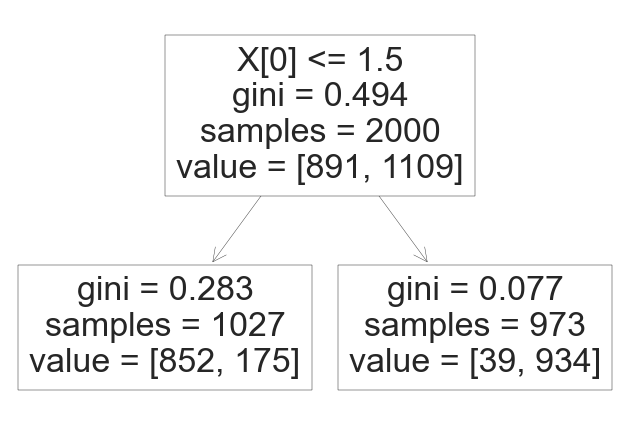

In [46]:
cls = hc.fcluster(Z, criterion="maxclust", t=2)
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(np.array(cls).reshape(len(cls), 1), y)
print(np.mean(dtc.predict(np.array(cls).reshape(len(cls), 1)) == y))
plot_tree(dtc)

In [47]:
Z = hc.linkage(new_X_train, method="ward", metric="euclidean")

In [48]:
R = hc.dendrogram(Z, color_threshold=1)
fig = plt.gcf()
fig.set_size_inches(200, 200)
plt.ylabel('Distance (Euclidean)')
plt.xlabel('Sample index')
plt.show()

0.6257946529652529


[Text(0.6, 0.8333333333333334, 'X[0] <= 3.5\ngini = 0.468\nsamples = 22966\nvalue = [8594, 14372]'),
 Text(0.4, 0.5, 'X[0] <= 2.5\ngini = 0.412\nsamples = 7403\nvalue = [2150, 5253]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.495\nsamples = 4613\nvalue = [2082, 2531]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.048\nsamples = 2790\nvalue = [68, 2722]'),
 Text(0.8, 0.5, 'gini = 0.485\nsamples = 15563\nvalue = [6444, 9119]')]

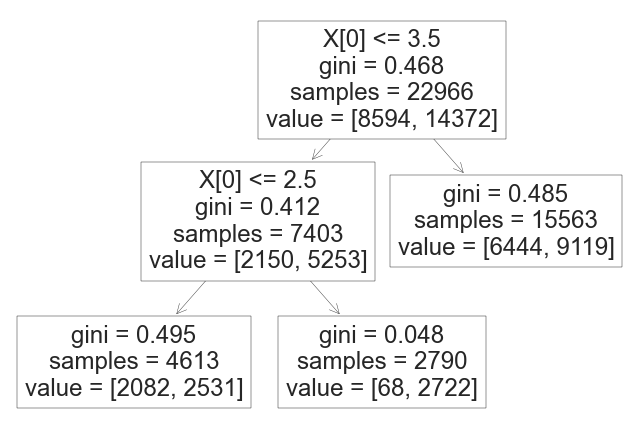

In [57]:
cls = hc.fcluster(Z, criterion="maxclust", t=4)
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(np.array(cls).reshape(len(cls), 1), new_y_train)
print(np.mean(dtc.predict(np.array(cls).reshape(len(cls), 1)) == new_y_train))
plot_tree(dtc)
plt.show()